In [31]:
import pandas as pd 
from pandas import Series
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import math

data = pd.read_csv("dataUK.csv",encoding = "ISO-8859-1") 
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [32]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [33]:
print('Nombre de pays origines des différents clients :  ',len(data.Country.unique()))
countries=data.Country.unique()

Nombre de pays origines des différents clients :   38


### Ce magasin a servi des clients de 38 nationalités, pour cela nous allons voir par la suite les nationalités qui sont le mieux représentées 

In [34]:
class CountryData(object):
    #Initialisation des objets
    countryName = ""
    countryData=pd.DataFrame(data=None, columns=['a'])
    countryNbOfTransactions=0
    countryTotalSell=0

    
    #Constructeurs
    def __init__(self, countryName, countryData,countryNbOfTransactions,countryTotalSell):
        self.countryName = countryName
        self.countryData = countryData
        self.countryNbOfTransactions = countryNbOfTransactions
        self.countryTotalSell = countryTotalSell

In [35]:
allCountriesData=[]
for country in countries:
    allCountriesData.append(CountryData(country,data[data.Country==country],data[data.Country==country].shape[0],
                                     sum(data[data.Country==country].UnitPrice*data[data.Country==country].Quantity)) )


# Les Tops 6 des pays qui rapportent le plus en termes de chiffre d'affaire

In [36]:
mapper={}
for obj in allCountriesData:
    mapper[obj.countryName]=obj.countryTotalSell
sortedMapper=sorted(mapper.items(), key=lambda x: x[1],reverse=True)

### Ci-dessous les tops 6 pays qui contribuent le plus en CA du magasin

In [37]:
topCountries=sortedMapper[:6]
topCountries

[('United Kingdom', 8187806.364001113),
 ('Netherlands', 284661.54000000015),
 ('EIRE', 263276.81999999826),
 ('Germany', 221698.20999999862),
 ('France', 197403.90000000002),
 ('Australia', 137077.26999999973)]

In [38]:
topCountriesData=[]
for obj in topCountries:
    topCountriesData.append(CountryData(obj[0],data[data.Country==obj[0]],data[data.Country==obj[0]].shape[0],
                                     sum(data[data.Country==obj[0]].UnitPrice*data[data.Country==obj[0]].Quantity)) )

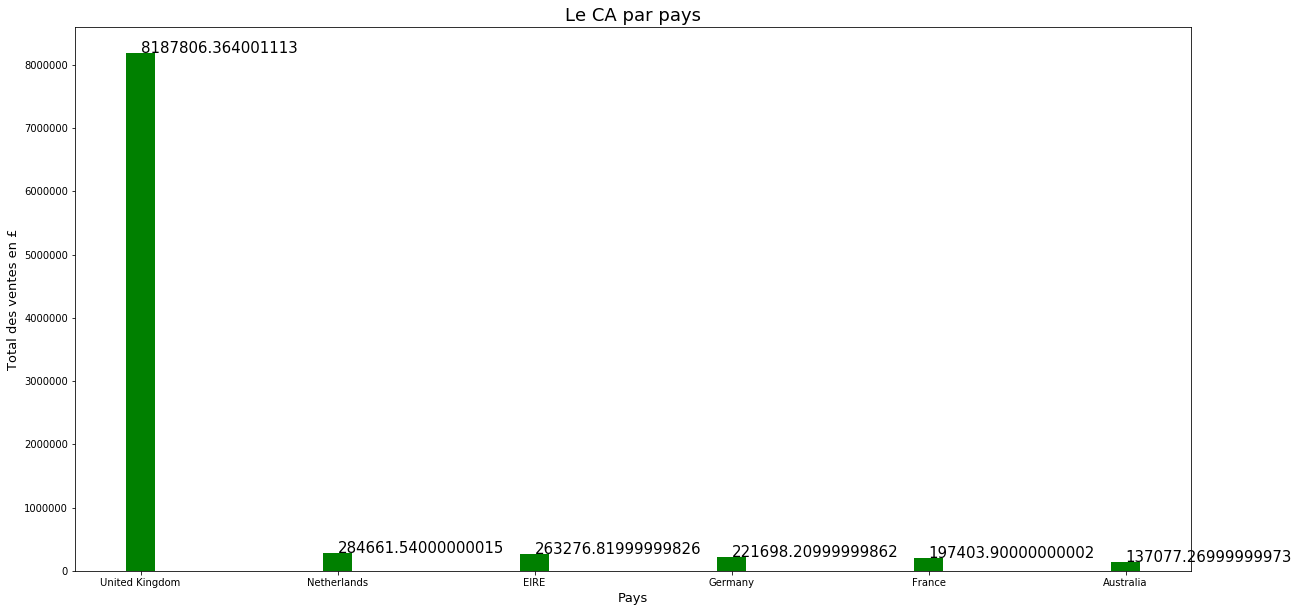

In [39]:
w=0.15
plt.figure(figsize=(20,10))
transactions=[]
totalSells=[]
tCountries=[]
for obj in topCountriesData:
    transactions.append(obj.countryNbOfTransactions)
    totalSells.append(obj.countryTotalSell)
    tCountries.append(obj.countryName)
X=np.arange(6)
plt.bar(X, totalSells,width=w,color='g',align='center')    
plt.xticks(X,tCountries) 
plt.ylabel('Total des ventes en £', fontsize=13)
plt.xlabel('Pays', fontsize=13)
plt.title('Le CA par pays', fontsize=18)
for i in range(6):
    plt.text(x = i , y = totalSells[i]+0.1, s = totalSells[i], size = 15)


plt.show()


### On remarque que le pays qui compte une grande contribution en CA, et donc le royaume uni cela est trivial certe car le magasin est basé dans ce pays.

- Pour les autres pays du podium on remarque qu'il n'y a pas une grande différence, mais ils ont une contribution  considérablement inférieure, alors qu'il y a un fort potentiel d'achat dans ces pays, principalement européens.  

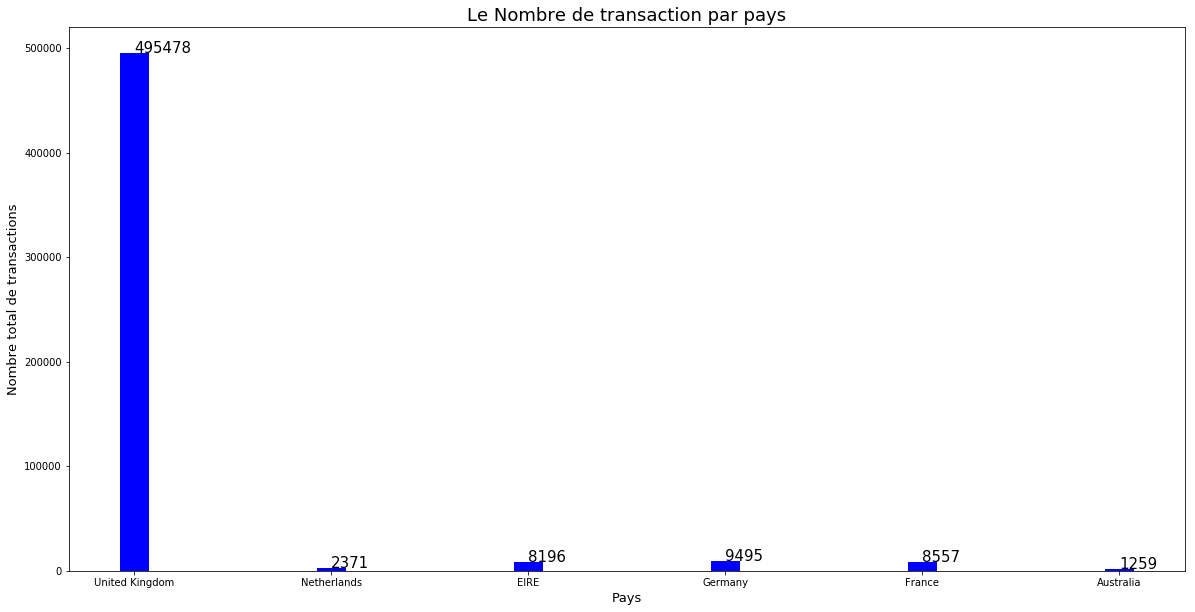

In [40]:
plt.figure(figsize=(20,10))
plt.bar(X, transactions,width=w,color='b',align='center')
plt.xticks(X,tCountries) 
plt.ylabel('Nombre total de transactions', fontsize=13)
plt.xlabel('Pays', fontsize=13)
plt.title('Le Nombre de transaction par pays',fontsize=18)
for i in range(6):
    plt.text(x = i , y = transactions[i]+0.1, s = transactions[i], size = 15)

plt.show()

## Les clients du royaume uni ont effectué un nombre de transactions très important, ceci est logique.
- Mais pour le pays-bas qui est le 2ème pays en terme de contribution en CA, compte un nombre de transaction 4 fois plus inférieur que le 3ème pays dans ce même classement, et donc on déduit qu'il y a un très bon marché dans ce pays avec un pouvoir d'achat très important, une bonne idée sera de:

  - Ouvrir une franchise au pays-bas.
  - Fidéliser encore plus de client issuent des pays-bas.

In [41]:
countries_TS=[]
for obj in topCountriesData:
        pandasData=obj.countryData[['InvoiceDate','UnitPrice','Quantity']]
        pandasData['Total_sell'] =  (pandasData.UnitPrice)*(pandasData.Quantity)
        pandasData=pandasData.drop(['UnitPrice','Quantity'], axis=1)
        ts = pandasData.set_index(['InvoiceDate'])
        ts.index = pd.to_datetime(ts.index)
        g_daily = ts.groupby(pd.Grouper(freq="D"))
        g_Daily_Without_Zeros=g_daily.sum()[g_daily.sum().Total_sell!=0]
        countries_TS.append(g_Daily_Without_Zeros)

C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


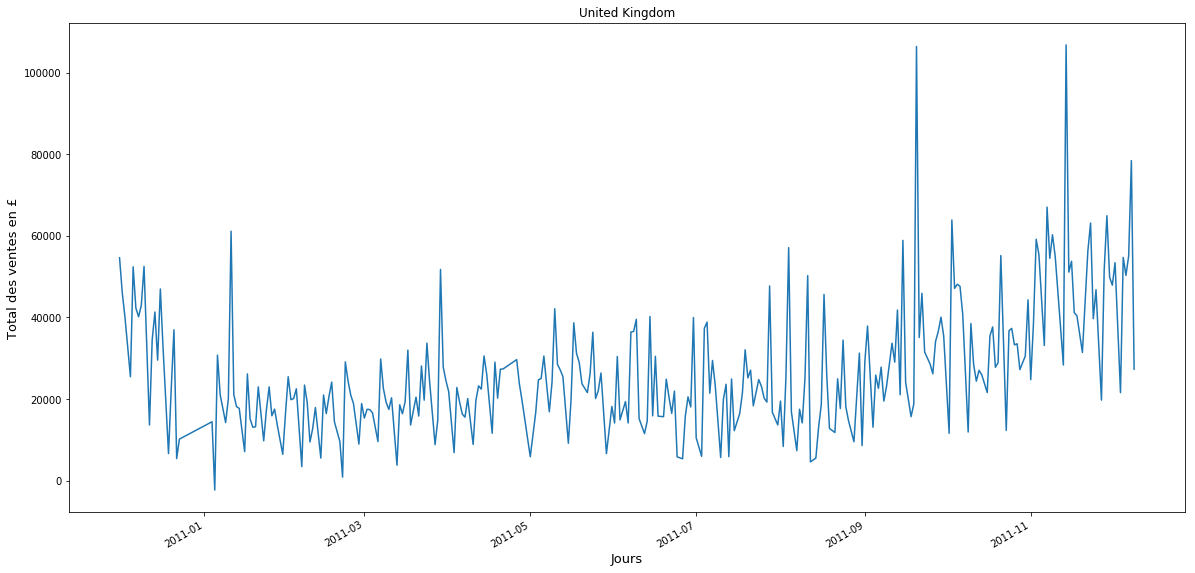

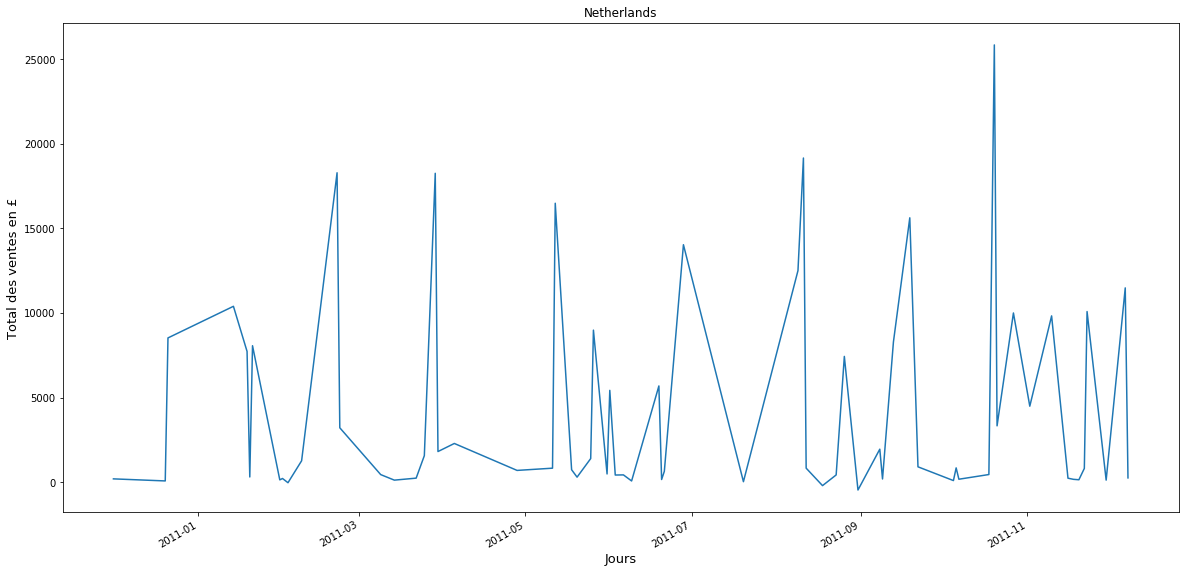

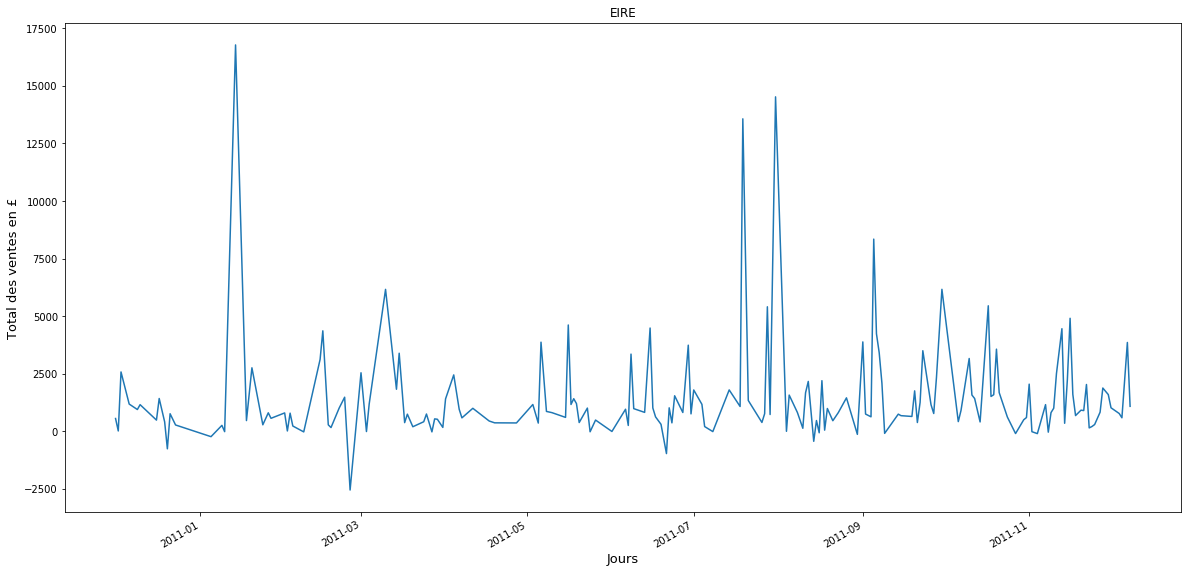

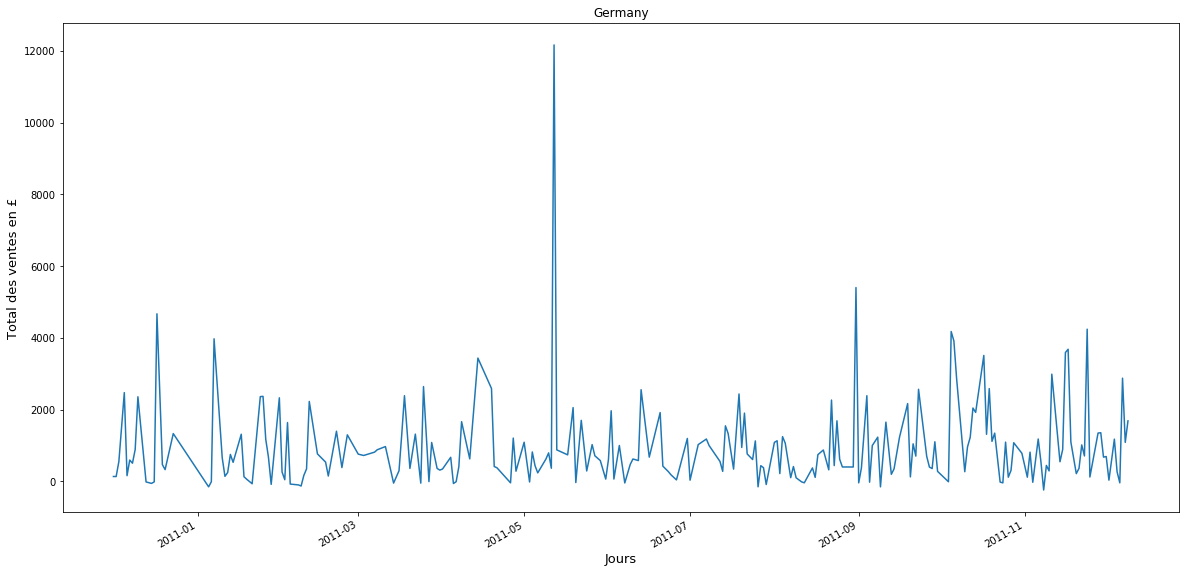

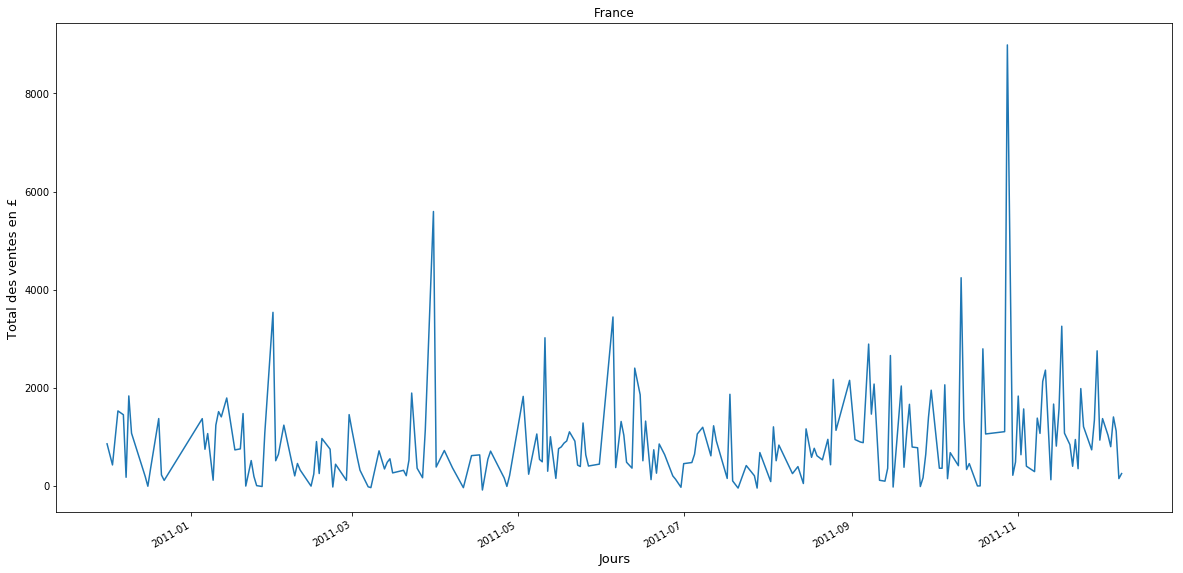

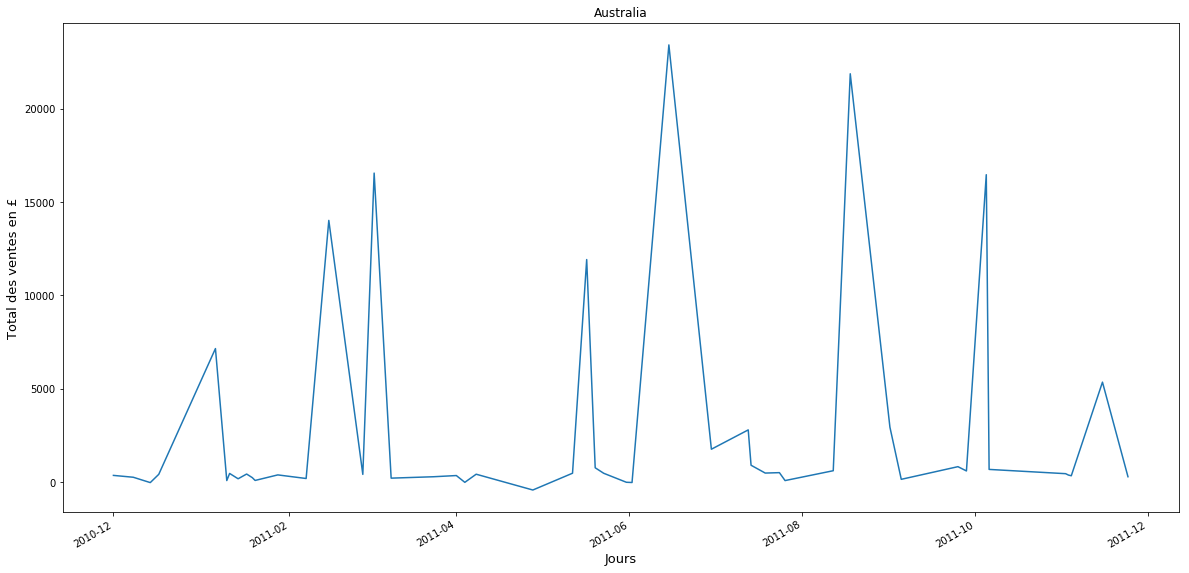

In [42]:
i=0
for country in countries_TS:
    ts_tot_Daily=country.squeeze()
    plt.figure(figsize=(20,10))
    plt.ylabel('Total des ventes en £', fontsize=13)
    ts_tot_Daily.plot()
    plt.title(topCountries[i][0])
    i+=1
    plt.xlabel('Jours', fontsize=13)
    plt.show()

In [43]:
#Remove_Indexation
for country in countries_TS:
    country.reset_index(inplace=True)

In [44]:
type(countries_TS[0])

pandas.core.frame.DataFrame

In [45]:
class TrainTest(object):
    #Initialisation des objets
    train = pd.DataFrame(data=None, columns=['a'])
    test=pd.DataFrame(data=None, columns=['a'])
    #Constructeurs
    def __init__(self, train, test):
        self.train = train
        self.test = test
       

In [46]:
countries_TS[0].shape

(305, 2)

C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


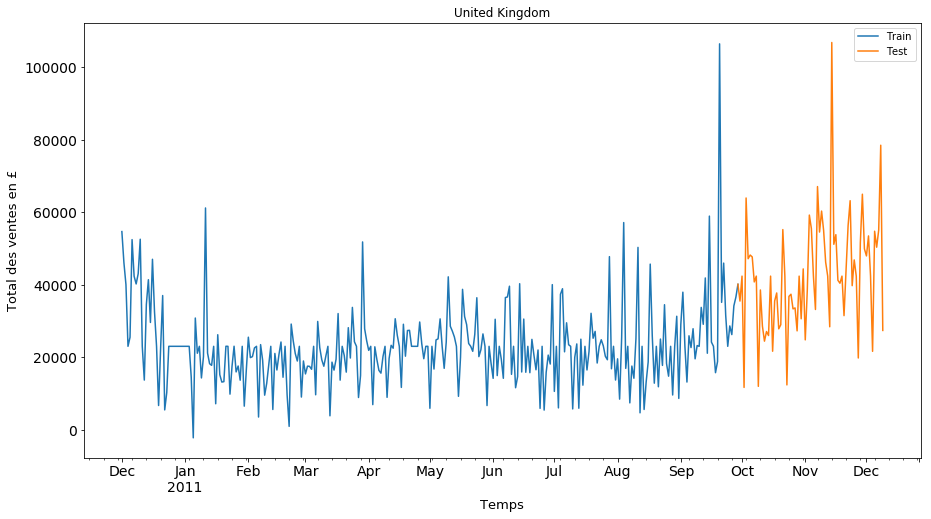

C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


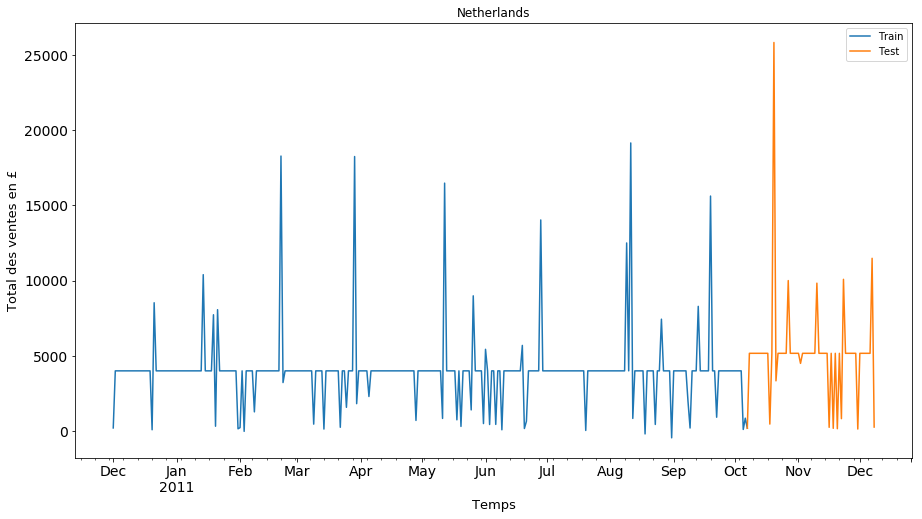

C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


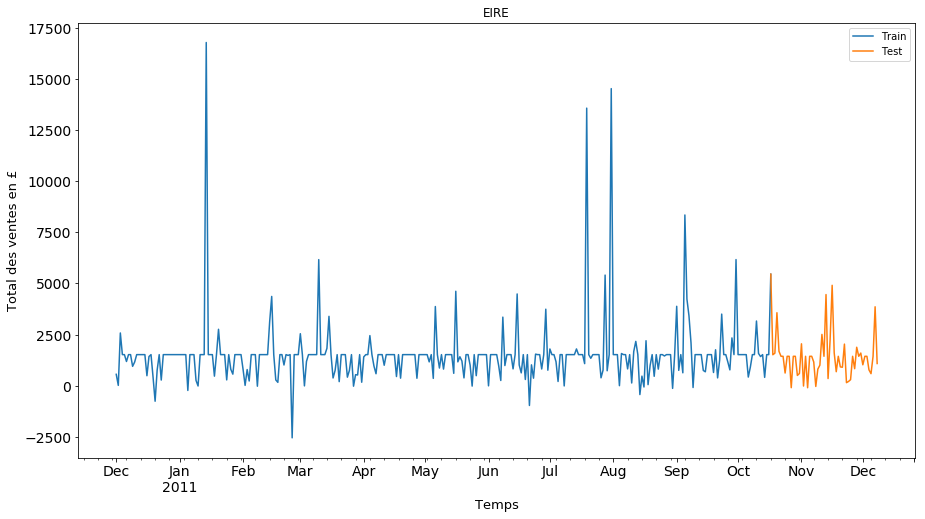

C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


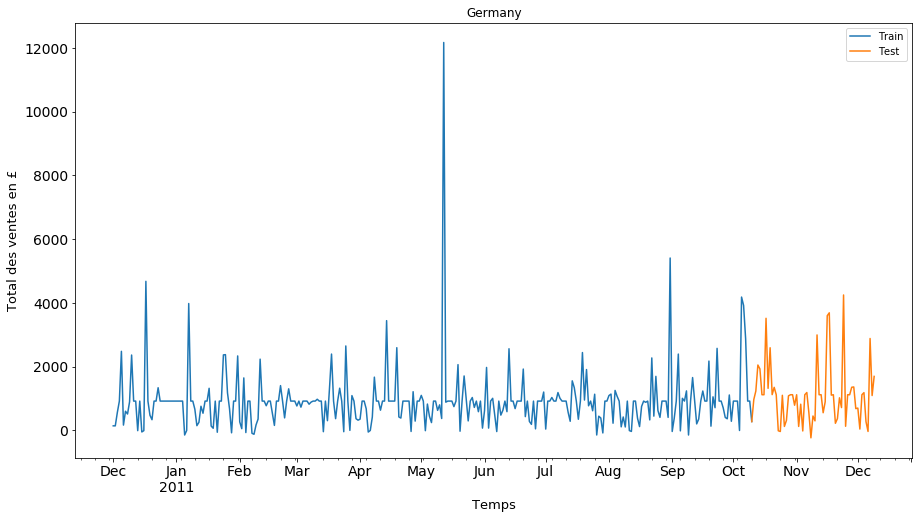

C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


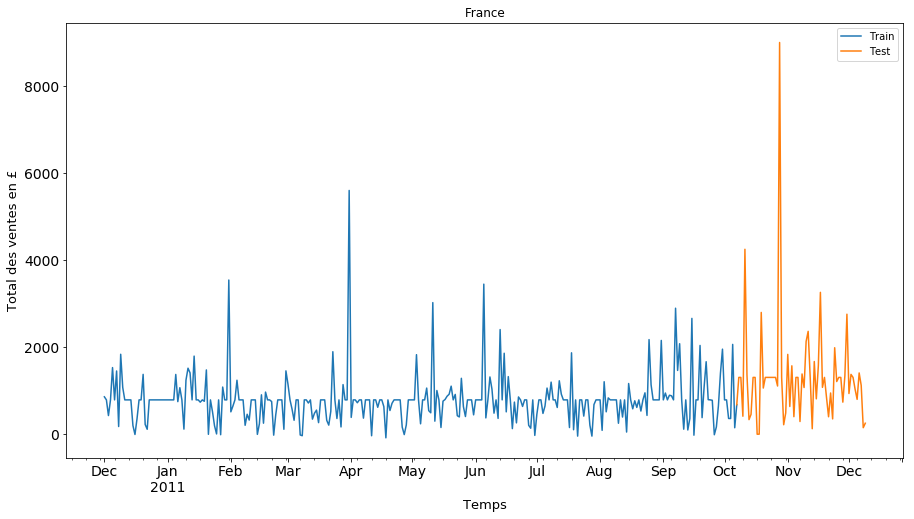

C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


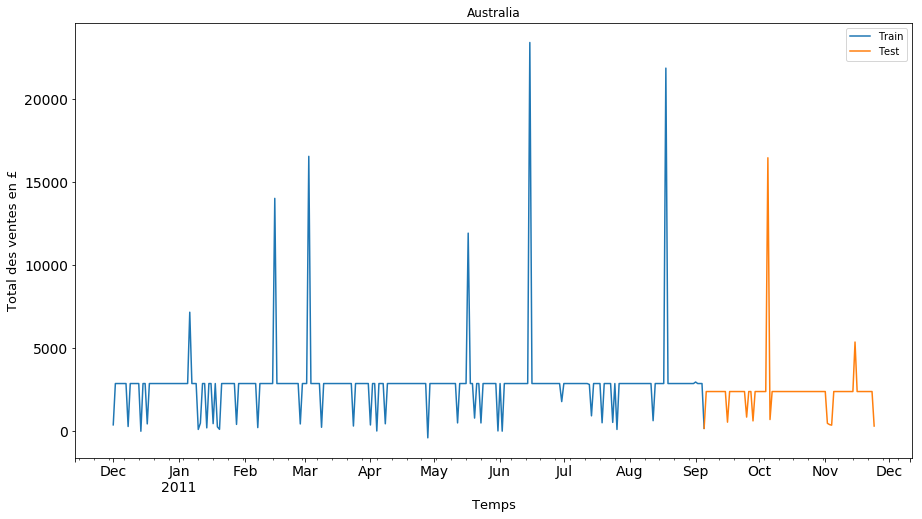

In [90]:
allTrainTest=[]
i=0
for country in countries_TS:
    spliter=math.floor(country.shape[0]*0.8)
    train=country[:spliter]
    test=country[spliter-1:]
    mean_total_sell_list_TRAIN_country=train.Total_sell.mean()
    mean_total_sell_list_TEST_country=test.Total_sell.mean()   
    train.Timestamp = pd.to_datetime(train.InvoiceDate,format='%m/%d/%Y %H:%M') 
    train.index = train.Timestamp 
    train = train.resample('D').mean() 
    test.Timestamp = pd.to_datetime(test.InvoiceDate,format='%m/%d/%Y %H:%M') 
    test.index = test.Timestamp 
    test = test.resample('D').mean()
    
    allTrainTest.append(TrainTest(train,test))
    #Fill the missing values By mean
    train['Total_sell'][train['Total_sell']!=train['Total_sell']]=mean_total_sell_list_TRAIN_country
    test['Total_sell'][test['Total_sell']!=test['Total_sell']]=mean_total_sell_list_TEST_country
    train.Total_sell.plot(figsize=(15,8), label='Train', fontsize=14)
    test.Total_sell.plot(figsize=(15,8), label='Test', fontsize=14)
        
    plt.ylabel('Total des ventes en £', fontsize=13)
    plt.xlabel('Temps', fontsize=13)
    plt.legend(loc='best')
    plt.title(topCountries[i][0])
    plt.show()
    i+=1
 


## Aucune tendance dans toutes les séries temporelles mais il y a une saisonnalité !

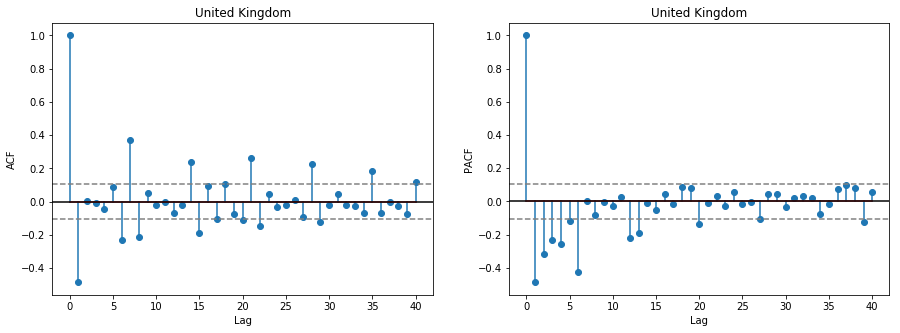

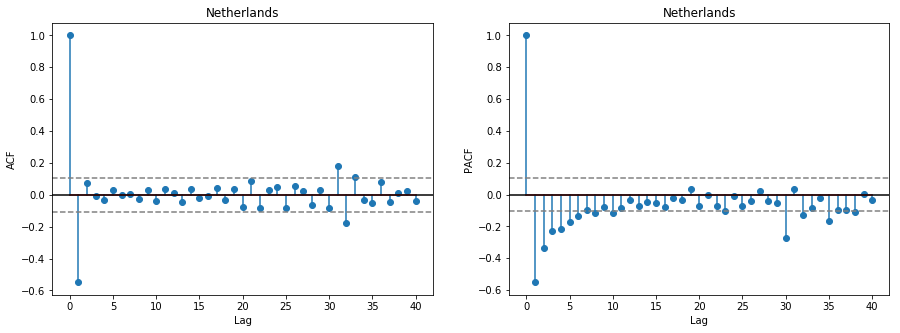

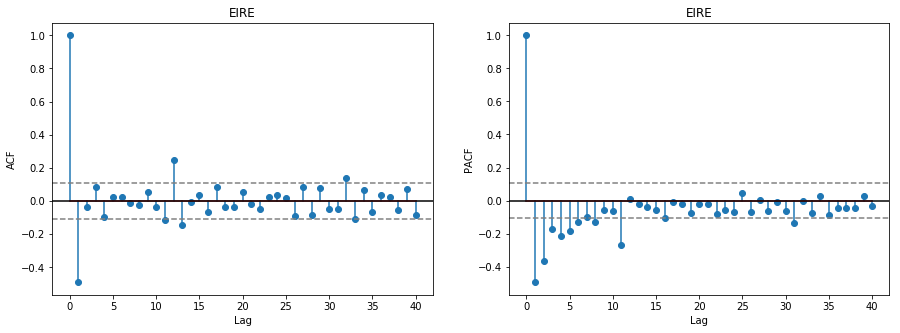

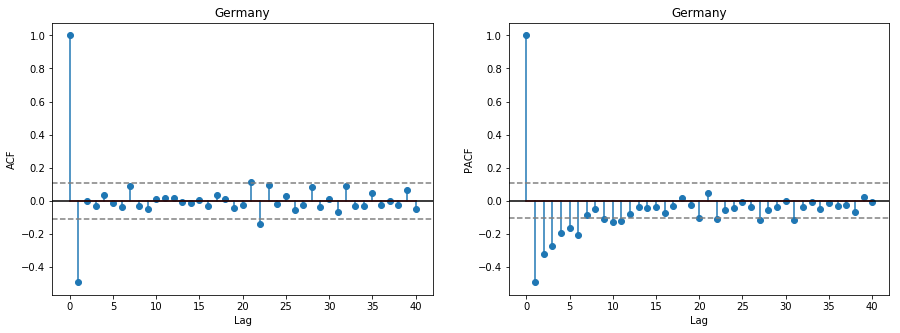

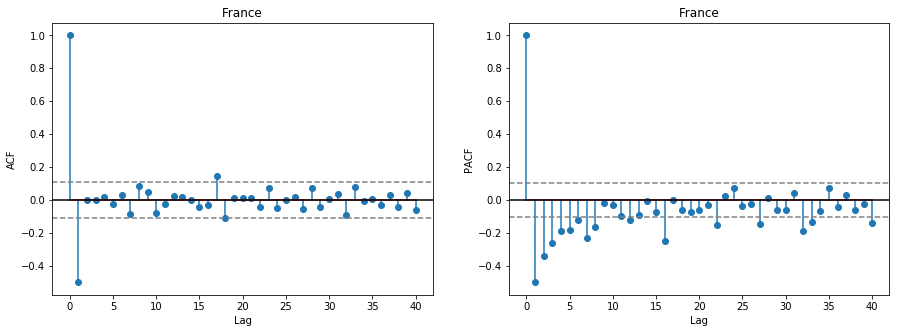

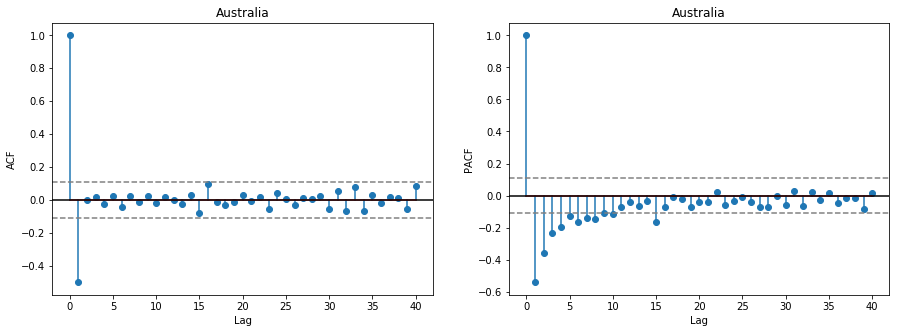

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
i=0
for item in allTrainTest:

    training_diff=item.train.diff(periods=1).values[1:]
    from statsmodels.tsa.stattools import acf, pacf
    lag_acf = acf(training_diff, nlags=40)
    lag_pacf = pacf(training_diff, nlags=40, method='ols')

    #plot ACF 
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.stem(lag_acf)
    plt.axhline(y=0,linestyle='-', color='black')
    plt.axhline(y=-1.96/np.sqrt(allTrainTest[0].train.shape[0]),linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(allTrainTest[0].train.shape[0]),linestyle='--', color='gray')
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.title(topCountries[i][0])
    #plot PACF 
    plt.subplot(122)
    plt.stem(lag_pacf)
    plt.axhline(y=0, linestyle='-', color='black')
    plt.axhline(y=-1.96/np.sqrt(item.train.shape[0]),linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(item.train.shape[0]),linestyle='--', color='gray')
    plt.xlabel('Lag')
    plt.ylabel('PACF')
    plt.title(topCountries[i][0])
    i+=1


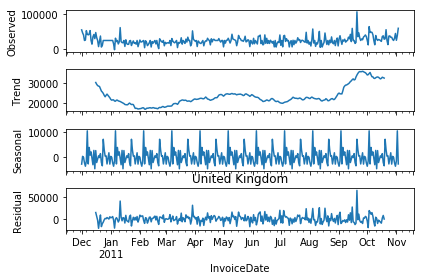

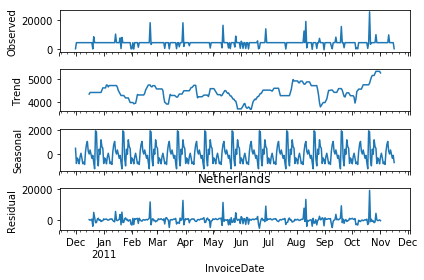

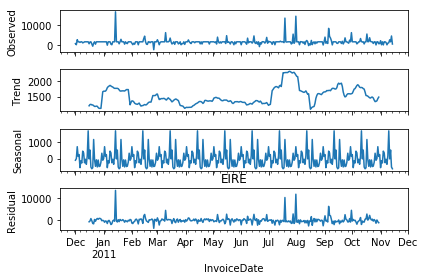

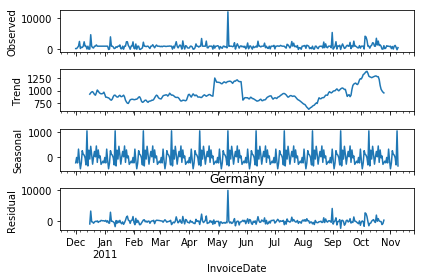

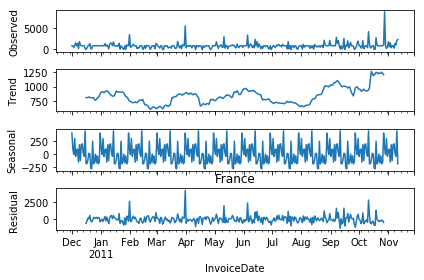

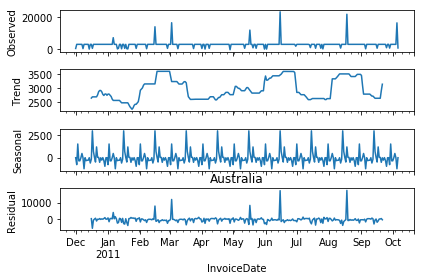

In [88]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
i=0
for obj in allTrainTest:
    result = seasonal_decompose(obj.train, model='additive', freq=30)
    result.plot()
    pyplot.title(topCountries[i][0])  
    pyplot.show()
  
    i+=1

## D'après les graphes d'ACF et PACF et le graphe de décomposition pour chacune des séries temporelles, on déduit les informations suivantes :

- Saisonnalité
  - UK : 7 jours
  - Netherlands : 30 jours 
  - EIRE : ~12 jours
  - Germany : saisonnalité pas claire
  - France : ~ 16 jours
  - Australia : 16 jours
- Tendance sur une fréquence mensuelle (30 jours) :
  - UK : principalement stationnaire, mais avec une allure de croissance dans les 3 derniers mois 
  - Netherlands : Stationnaire
  - EIRE : Stationnaire
  - Germany : Stationnaire sur l'ensemble avec une tendance baissière durant les dernier 20 jours
  - France : Stationnaire 
  - Australia : Stationnaire
